#### **California's Retail Store Performance**

**Project Overview**

**Objective :** \
Analyze retail store performance in California across various dimensions like sales, category, location, marketing and promotion

**Dataset Source :** \
*kaggle.com/datasets/pereprosov/retail-store-performance*

**Goal :** \
Provide actionable insights into potential relationship between sales and other variables. \
Identifying factors influencing sales by each store category, store location, promotion counts and marketing spend 

##### Import Libraries

In [287]:
# Essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization style libraries
# plt.style.use('dark_background')
plt.style.use('default')
import matplotlib
custom = {
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'figure.figsize': (10,8),
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'axes.facecolor': '#aaaaaa',
    'figure.facecolor': '#bbbbbb',
    'grid.color': '#000000',
    'grid.linewidth': 0.7,
    'legend.edgecolor': '#000000',
}
matplotlib.rcParams.update(custom)
import plotly.express as px

# Predictive Model libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Kagglehub library
import kagglehub

##### Data Collection

Loading Dataset

The dataset is stored in a downloadable csv file. \
It contains details such as Sales, Product, Store, Marketing, Customer, Employee and Competitor

In [288]:
# Download csv files from kaggle and stored in local machine

path = 'pereprosov/retail-store-performance'
url = kagglehub.dataset_download(path)
urlpath = '\Store_CA.csv'
file = f'{url}{urlpath}'
df = pd.read_csv(fr'{file}', low_memory=False, encoding='utf-8')

##### Data Preprocessing

- Remove null or duplicate values
- Convert data types
- Assign/Create new column based on suitable preference

In [275]:
"""
Data Inspection
"""
# Summary
print(f'Summary Statistics: \n{df.describe()}\n')

# Dataset Shape
print(f'Total Rows: {df.shape[0]} \nTotal Columns: {df.shape[1]}\n')

# Missing Value
print(f'Missing Data per Column: \n{df.isnull().sum()}\n')

# Duplicate Value
print(f'Duplicate Data per Column: \n{df.duplicated().sum()}\n')

# Head
print(f'Head: \n{df.head()}\n')

# Info
print(f'Info: \n{df.info()}\n')

Summary Statistics: 
       ProductVariety  MarketingSpend  CustomerFootfall    StoreSize  \
count     1650.000000     1650.000000       1650.000000  1650.000000   
mean       500.915758       27.460000       2020.028485   272.997576   
std        148.054223       13.014753        484.025786   131.048595   
min        100.000000        5.000000        500.000000    50.000000   
25%        396.000000       17.000000       1691.000000   156.000000   
50%        500.500000       27.000000       2021.000000   273.000000   
75%        602.750000       38.000000       2350.750000   385.500000   
max       1092.000000       50.000000       3627.000000   500.000000   

       EmployeeEfficiency     StoreAge  CompetitorDistance  PromotionsCount  \
count         1650.000000  1650.000000         1650.000000      1650.000000   
mean            72.198545    15.447879            9.933939         5.500606   
std             13.019817     8.667779            3.117450         1.388356   
min           

##### Exploratory Data Analysis

In [ ]:
# Overview dataset head
df [:2]

,ProductVariety,MarketingSpend,CustomerFootfall,StoreSize,EmployeeEfficiency,StoreAge,CompetitorDistance,PromotionsCount,EconomicIndicator,StoreLocation,StoreCategory,MonthlySalesRevenue
0,581,29,1723,186,84.9,1,12,6,108.3,Los Angeles,Electronics,284.90
1,382,31,1218,427,75.8,18,11,6,97.8,Los Angeles,Electronics,308.21


: 

Correlation Analysis :

In [276]:
df_copy = df
df_copy = df_copy.apply(lambda col: col.astype('category').cat.codes if col.dtypes=='object' else col)

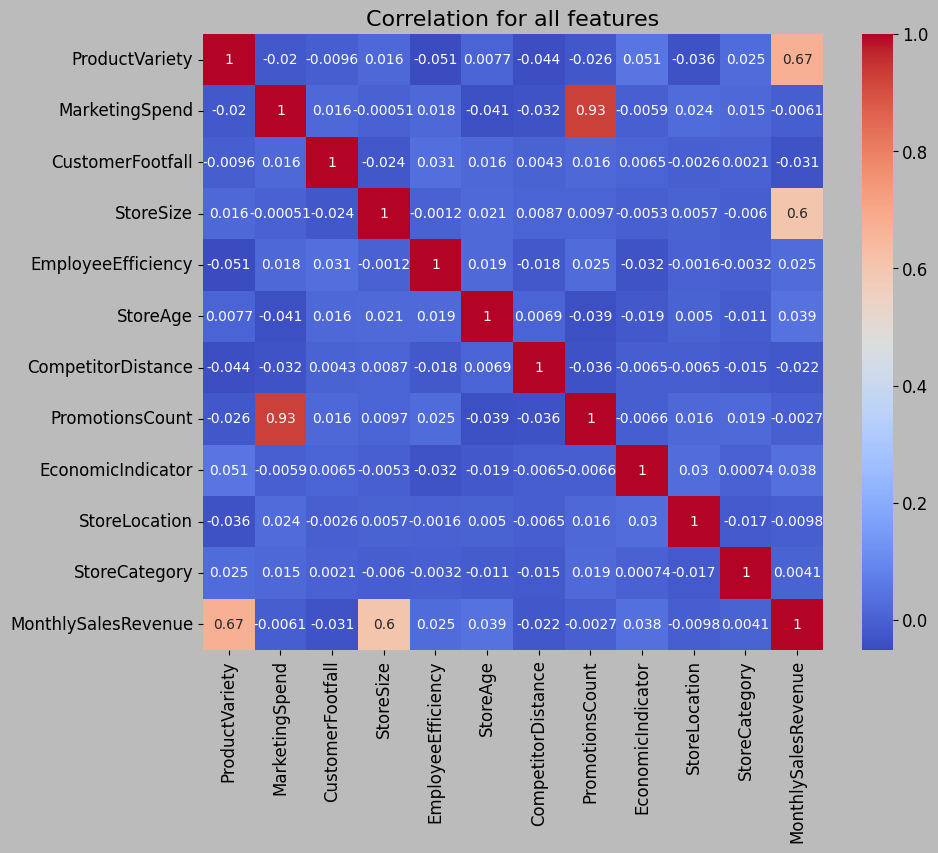

In [277]:
sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation for all features')

plt.show()

In [278]:
df [:2]

,ProductVariety,MarketingSpend,CustomerFootfall,StoreSize,EmployeeEfficiency,StoreAge,CompetitorDistance,PromotionsCount,EconomicIndicator,StoreLocation,StoreCategory,MonthlySalesRevenue
0,581,29,1723,186,84.9,1,12,6,108.3,Los Angeles,Electronics,284.90
1,382,31,1218,427,75.8,18,11,6,97.8,Los Angeles,Electronics,308.21


In [279]:
matplotlib.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': '#aaaaaa',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 

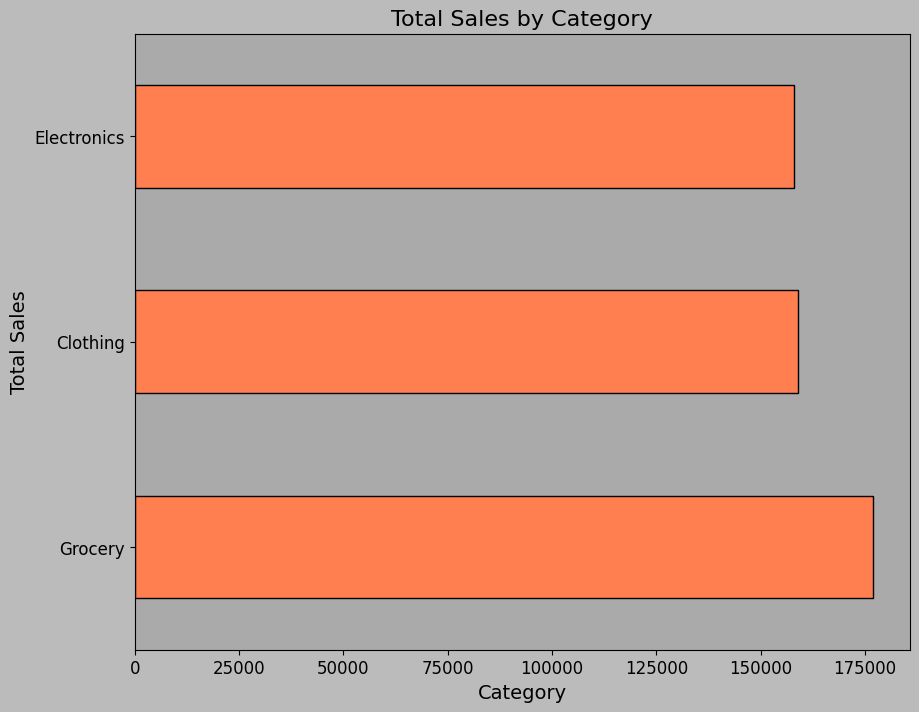

In [280]:
df.groupby('StoreCategory')['MonthlySalesRevenue'].sum().\
  sort_values(ascending=False).plot(kind='barh',
                                    color='coral', edgecolor='black')
plt.title('Total Sales by Category')
plt.ylabel('Total Sales')
plt.xlabel('Category')
plt.show()

Sales Analysis

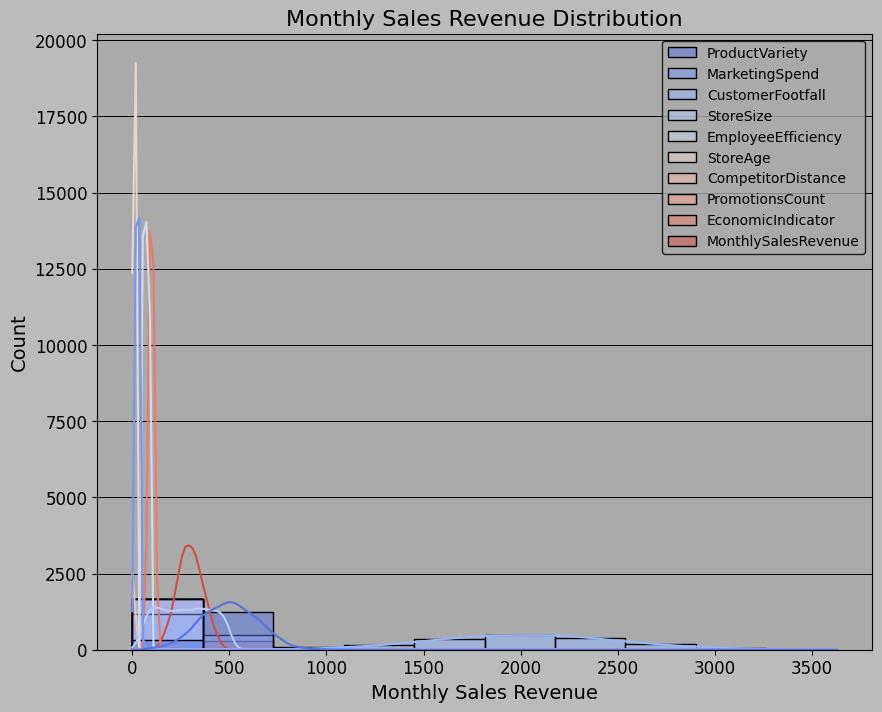

In [289]:
# Monthly Sales Revenue Distribution

sns.histplot(df,bins=10, kde=True, palette='coolwarm')
plt.title('Monthly Sales Revenue Distribution')
plt.xlabel('Monthly Sales Revenue')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

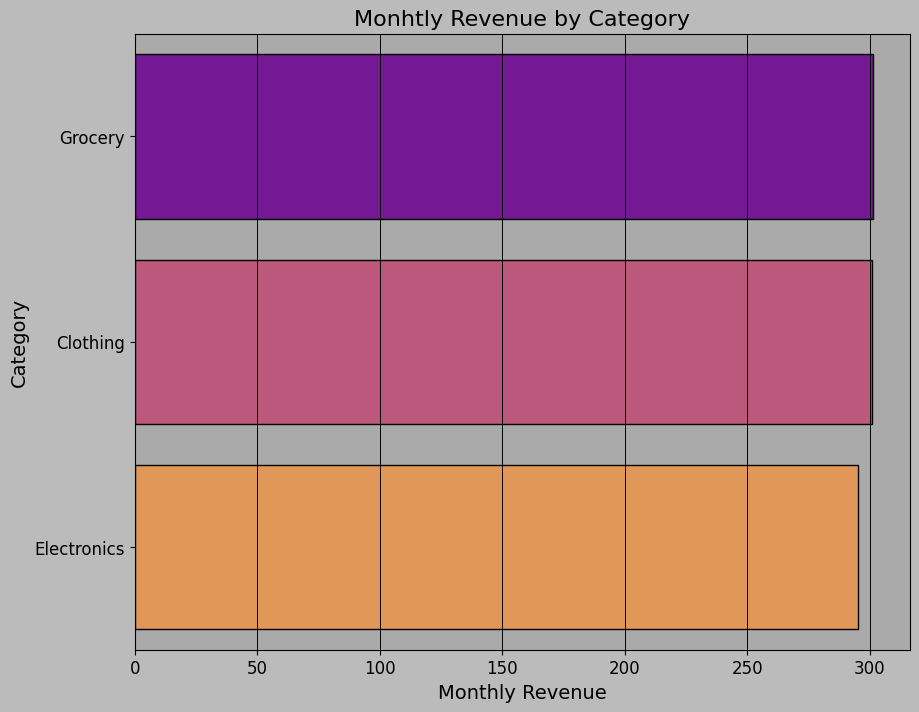

In [282]:
# Monthly Sales Revenue by Category

sns.barplot(df.groupby('StoreCategory')['MonthlySalesRevenue'].mean().sort_values(ascending=False),
            orient='h', palette='plasma', edgecolor='black')
plt.title('Monhtly Revenue by Category')
plt.xlabel('Monthly Revenue')
plt.ylabel('Category')
plt.grid(axis='x')
plt.show()

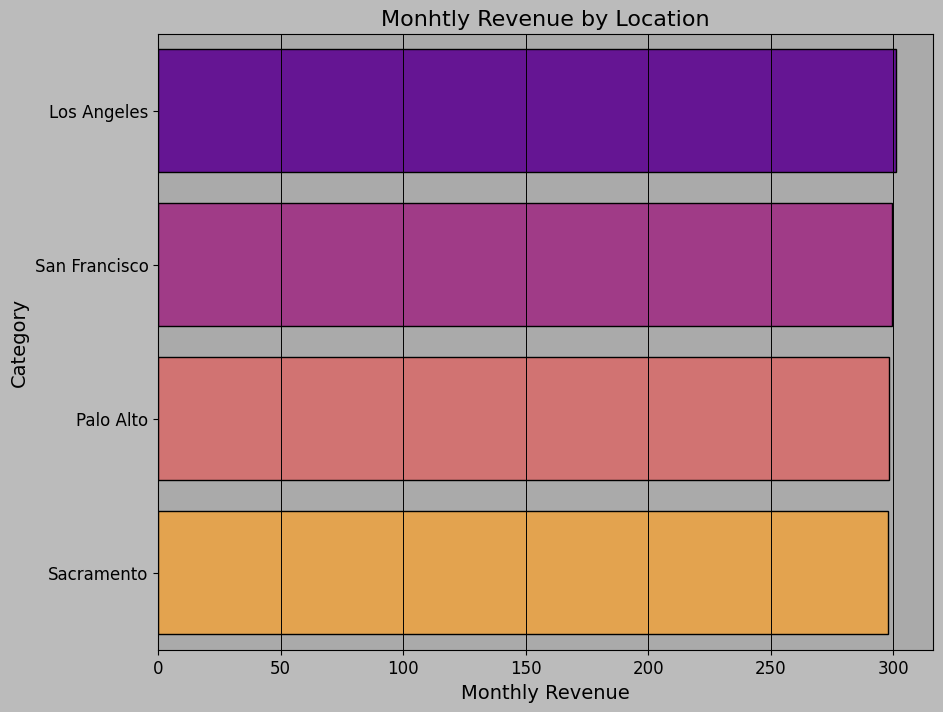

In [283]:
# Monthly Sales Revenue by Location

sns.barplot(df.groupby('StoreLocation')['MonthlySalesRevenue'].mean().sort_values(ascending=False),
            orient='h', palette='plasma', edgecolor='black')
plt.title('Monhtly Revenue by Location')
plt.xlabel('Monthly Revenue')
plt.ylabel('Category')
plt.grid(axis='x')
plt.show()

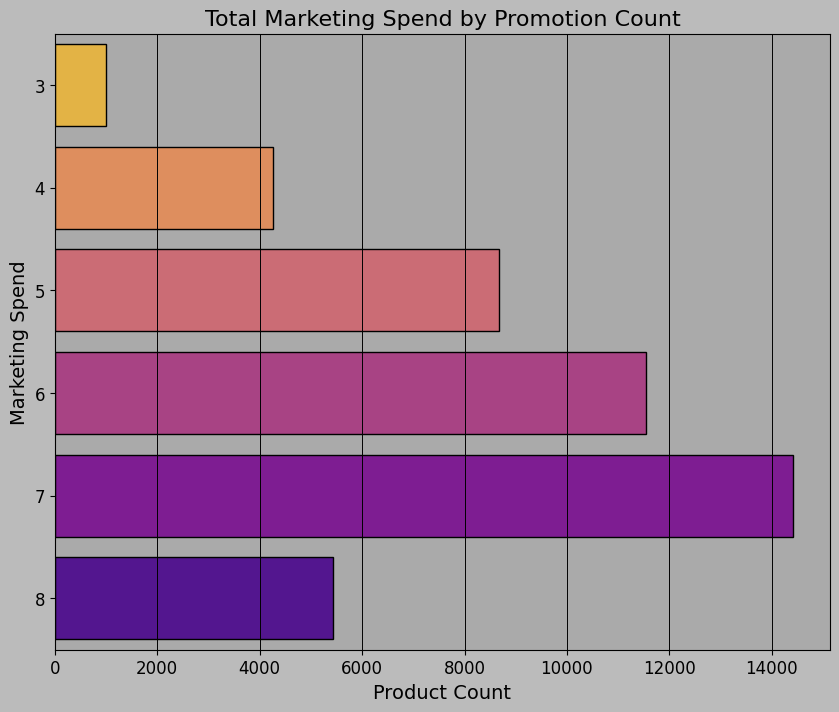

In [284]:
sns.barplot(df.groupby('PromotionsCount')['MarketingSpend'].sum().sort_values(ascending=False),
            orient='h', palette='plasma_r', edgecolor='black')
plt.title('Total Marketing Spend by Promotion Count')
plt.xlabel('Product Count')
plt.ylabel('Marketing Spend')
plt.grid(axis='x')
plt.show()

##### Advanced Analysis

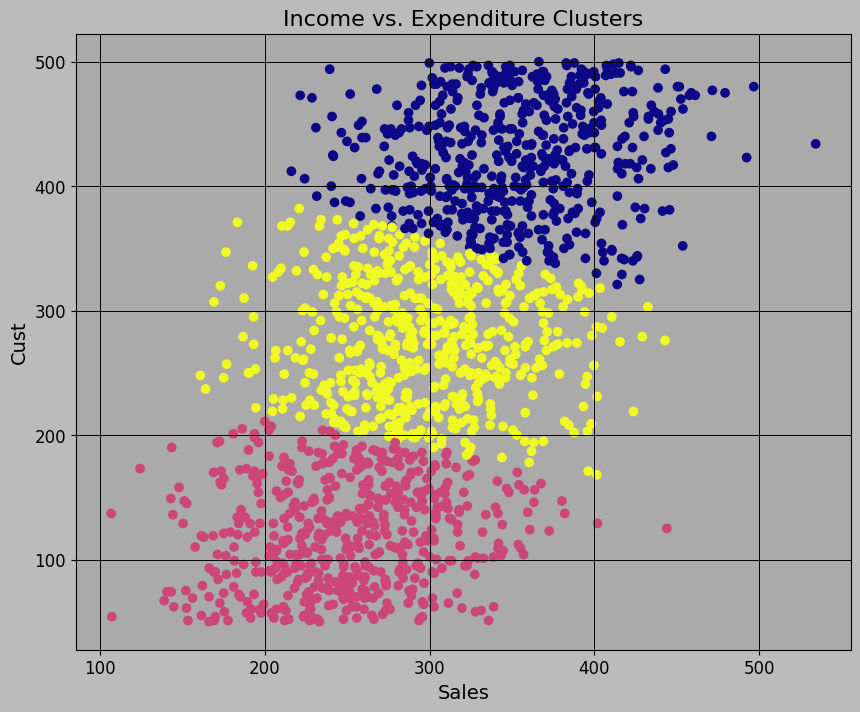

In [286]:
from sklearn.cluster import KMeans

# Select features for clustering
features = df[['MonthlySalesRevenue','StoreSize']].dropna()

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=0)
features['cluster'] = kmeans.fit_predict(features)

# Clustering
plt.scatter(features['MonthlySalesRevenue'], features['StoreSize'],
            c=features['cluster'], cmap='plasma')
plt.title('Income vs. Expenditure Clusters')
plt.xlabel('Sales')
plt.ylabel('Cust')
plt.grid()
plt.show()

##### Summary/Conclusion